In [ ]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
import requests
import json
import urllib.request
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
# import the required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
training_dataset=pd.read_csv('drive/MyDrive/Saner/Dataset (Whole-Primary)/mobile_preproccessed_whole_dataset.csv')
training_dataset

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
0,0,1668376,defect,Test failure in dom/base/test/test_window_clos...,GeckoView,General,RESOLVED,FIXED,2020-10-14 03:01:38,1668376,the symptom was that the broadcastchannel me...,NaN
1,1,1631754,defect,PanZoomController erroneously returns INPUT_RE...,GeckoView,General,RESOLVED,FIXED,2020-05-23 04:47:46,1631754,for websites which have their own event handle...,NaN
2,2,1677838,defect,NumberFormatExceptionjava.lang.Integer in pars...,GeckoView,General,RESOLVED,FIXED,2021-01-06 13:28:48,1677838,we are seeing these crash being reported on se...,NaN
3,4,1686100,enhancement,Route Service.onTrimMemory notifications throu...,GeckoView,General,RESOLVED,FIXED,2021-01-12 02:17:23,1686100,since android may send these to the services h...,NaN
4,5,1630229,defect,Crash in [@ java.lang.AssertionError: at org.m...,GeckoView,General,RESOLVED,FIXED,2020-05-28 05:17:09,1630229,this bug is for crash report bp ebbf ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5499,1683643,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,DUPLICATE,2021-07-30 19:04:17,1683643,filed by rmaries at mozilla com parse...,1682775.0
5316,5500,1649160,defect,Download Feature: unicode RTLO char can fake t...,Firefox for iOS,General,RESOLVED,FIXED,2020-12-18 17:20:48,1649160,created attachment regedt‮gpj exe summary ...,NaN
5317,5501,1514619,defect,Menu options are in different order than new t...,Firefox for iOS,Menu and Toolbar,RESOLVED,INVALID,2019-02-11 16:36:05,1514619,created attachment png the hostor...,NaN
5318,5502,1546822,defect,Notifications repeating if not acted on in iOS...,Firefox for iOS,Sync,RESOLVED,WORKSFORME,2019-09-18 10:10:20,1546822,created attachment syncnotificationecho png ...,NaN


In [ ]:
nan_value = float("NaN")
training_dataset.replace("", nan_value, inplace=True)
training_dataset.dropna(subset = ["Description"], inplace=True)

In [ ]:
cond = (training_dataset['Description'] == 'NaN')
cond.unique()

array([False])

In [ ]:
duplicate_test = training_dataset[training_dataset['Duplicate_Bug_Ids'] > 0]
duplicate_test

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
40,44,1672552,defect,BrowserParent::GetDocShellIsActive returns fal...,GeckoView,General,RESOLVED,DUPLICATE,2020-10-28 07:48:06,1672552,though i wanted to provide a simple way to con...,1673316.0
47,52,1672566,defect,[Bug] TransactionTooLargeException,GeckoView,General,RESOLVED,DUPLICATE,2020-11-12 22:21:38,1672566,from github mobile fenix issues st...,1672095.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
94,103,1375994,defect,Unclear how the app icon badge is incremented,Firefox for iOS,Firefox Accounts,RESOLVED,DUPLICATE,2017-06-28 10:58:10,1375994,it is unclear how the badge on the icon is inc...,1374987.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5307,5491,1521741,defect,"In Reader mode, specific article on English Wi...",Firefox for iOS,Reader View,RESOLVED,DUPLICATE,2019-09-30 06:44:59,1521741,on a page like plants and animals of austro...,782423.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
ted = duplicate_test['Description']

## Using TF-IDF with cosine similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re

tfidf_vectorizer = TfidfVectorizer()
stemmer = PorterStemmer()

def tokenizer(arg):
    tokens = re.split(r'(\W+)', arg.lower())
    tokens = [
        token for token in tokens
        if re.match('\\w+', token) and not re.match('\\d+', token)
    ]
    
    return list(map(stemmer.stem, tokens))
tfidf_vectorizer.tokenizer = tokenizer
tfidf_vectorizer.fit(duplicate_test.Description)
tfidf_matrix_desc = tfidf_vectorizer.transform(duplicate_test.Description)

len(tfidf_vectorizer.get_feature_names())

In [ ]:
tfidf_matrix_desc.shape

(562, 3704)

In [ ]:
ted = duplicate_test['Description']
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(562, 4587)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(ted)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.03626514 0.04771126 ... 0.00819527 0.00431848 0.00813439]
 [0.03626514 1.         0.0923619  ... 0.0118519  0.01097122 0.01176386]
 [0.04771126 0.0923619  1.         ... 0.02953536 0.02568051 0.03026084]
 ...
 [0.00819527 0.0118519  0.02953536 ... 1.         0.99182525 0.99854414]
 [0.00431848 0.01097122 0.02568051 ... 0.99182525 1.         0.99091449]
 [0.00813439 0.01176386 0.03026084 ... 0.99854414 0.99091449 1.        ]]


In [ ]:
print(len(cosine_sim))
print(cosine_sim.shape)

562
(562, 562)


In [ ]:
avg =np.average(cosine_sim, axis=1)
cosine_sim[1]

In [ ]:
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
print(avg_df)
print(len(avg_df))

In [ ]:
avg_for_sorting = pd.DataFrame(avg_df)

In [ ]:
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
sorted

,Avg_Sim_Score
239,0.194145
251,0.191696
261,0.191287
187,0.191271
267,0.190952
...,...
442,0.012186
551,0.011917
451,0.011812
357,0.008554


In [ ]:
import statistics
from scipy.stats import skew
#testing skewness of distribution
print(skew(avg))
print(skew(avg, bias=False))

1.20656537160451
1.2097967634870073


In [ ]:
median = statistics.median(avg)
print(statistics.median(avg))

0.05737684438117005


In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Score',
          value=avg_df.values)

In [ ]:
score_similar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= median]
score_similar_unigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
40,44,1672552,defect,BrowserParent::GetDocShellIsActive returns fal...,GeckoView,General,RESOLVED,0.075070,DUPLICATE,2020-10-28 07:48:06,1672552,though i wanted to provide a simple way to con...,1673316.0
47,52,1672566,defect,[Bug] TransactionTooLargeException,GeckoView,General,RESOLVED,0.069075,DUPLICATE,2020-11-12 22:21:38,1672566,from github mobile fenix issues st...,1672095.0
94,103,1375994,defect,Unclear how the app icon badge is incremented,Firefox for iOS,Firefox Accounts,RESOLVED,0.058446,DUPLICATE,2017-06-28 10:58:10,1375994,it is unclear how the badge on the icon is inc...,1374987.0
100,109,1726138,defect,mac screen reader not moving to date selection,Firefox for iOS,Browser,RESOLVED,0.058162,DUPLICATE,2021-08-18 08:34:58,1726138,user agent mozilla applewebkit ch...,1726203.0
119,128,1492707,defect,Crash in java.lang.NullPointerException: Attem...,GeckoView,General,RESOLVED,0.085633,DUPLICATE,2018-12-20 08:27:20,1492707,this bug was filed from the socorro interface ...,1492704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,5485,1541632,defect,developer.android.com page layout is broken in...,GeckoView,General,RESOLVED,0.063780,DUPLICATE,2019-04-04 11:04:29,1541632,this bug was originally filed in the fenix iss...,1530050.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
score_dissimilar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] < median]
score_dissimilar_unigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
229,240,1628075,defect,Intermittent editor/libeditor/crashtests/14244...,GeckoView,General,RESOLVED,0.043986,DUPLICATE,2020-05-11 13:37:50,1628075,filed by rmaries at mozilla com parse...,1635914.0
246,257,1535139,defect,Startup Crash on Android Q emulator,GeckoView,General,RESOLVED,0.054586,DUPLICATE,2019-04-21 18:39:54,1535139,i get a crash when trying to launch geckoview ...,1535196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,5431,1418463,defect,Images are not Rendered in some pages (Hide Im...,Firefox for iOS,Browser,RESOLVED,0.052909,DUPLICATE,2017-11-21 10:01:11,1418463,user agent mozilla gecko firefox ...,1416849.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0
5277,5458,1585323,defect,Apps can't use ExoPlayer with GeckoView,GeckoView,General,RESOLVED,0.025051,DUPLICATE,2019-10-01 11:20:12,1585323,since we use exoplayer internally this causes...,1523544.0
5292,5474,1522123,defect,[iPad] Top sites row number is not consistent ...,Firefox for iOS,General,RESOLVED,0.047871,DUPLICATE,2019-01-25 10:43:50,1522123,build device ipad air ios prec...,1519874.0


In [ ]:
# import the required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val       0.008482        0.040302  0.057377         0.08148   

   upper_whisker  
0       0.141514  


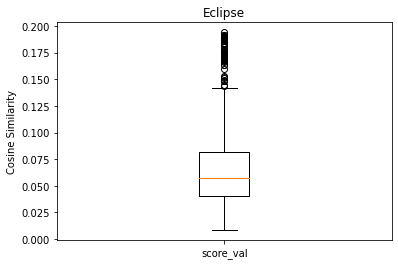

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.040302
more =  0.08148 

In [ ]:
score_similar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
119,128,1492707,defect,Crash in java.lang.NullPointerException: Attem...,GeckoView,General,RESOLVED,0.085633,DUPLICATE,2018-12-20 08:27:20,1492707,this bug was filed from the socorro interface ...,1492704.0
178,187,1637765,defect,Calling `install.cancel` throws when the exten...,GeckoView,Extensions,RESOLVED,0.083739,DUPLICATE,2020-07-01 17:34:56,1637765,originally filed as bug if the extension ha...,1559683.0
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1845,1894,1592632,enhancement,Need a way to identify what site sent the Web ...,GeckoView,General,RESOLVED,0.082363,DUPLICATE,2021-02-09 13:21:59,1592632,user agent mozilla gecko firefox ...,1642345.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
score_dissimilar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
512,526,1591737,defect,Add isFocused info to Autofill elements.,GeckoView,General,RESOLVED,0.039634,DUPLICATE,2019-12-04 10:45:58,1591737,currently the amazon co uk sign in form and r...,1591462.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,5390,1359983,enhancement,[geckoview] video controls are broken,GeckoView,General,RESOLVED,0.019539,DUPLICATE,2018-12-20 08:27:20,1359983,bug broke the video controls,1355538.0
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0


## Using N gram to divide

## Unigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(562, 2263)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.04246202 0.05574089 ... 0.00927583 0.00489032 0.0092107 ]
 [0.04246202 1.         0.09862302 ... 0.01226055 0.01135518 0.01217447]
 [0.05574089 0.09862302 1.         ... 0.03048638 0.02652066 0.03124805]
 ...
 [0.00927583 0.01226055 0.03048638 ... 1.         0.99232143 0.99895438]
 [0.00489032 0.01135518 0.02652066 ... 0.99232143 1.         0.99181753]
 [0.0092107  0.01217447 0.03124805 ... 0.99895438 0.99181753 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.06785992311407305


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile   median  upper_quartile  \
0  score_val       0.009908        0.048793  0.06786        0.094407   

   upper_whisker  
0       0.162102  


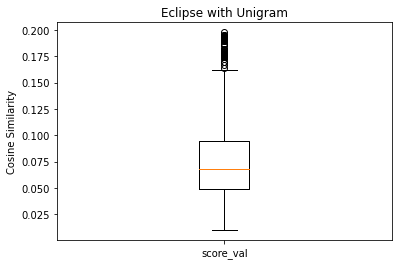

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Unigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less =  0.048793
more =  0.094407

In [ ]:
score_similar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram1_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2144,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
2154,2206,1703350,defect,Intermittent org.mozilla.geckoview.test.TextIn...,GeckoView,General,RESOLVED,0.136409,DUPLICATE,2021-12-12 22:00:43,1703350,filed by csabou at mozilla com parsed...,1681261.0
2188,2241,1574141,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.138157,DUPLICATE,2021-07-30 18:59:53,1574141,filed by cbrindusan at mozilla com pa...,1564920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
score_dissimilar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram1_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
229,240,1628075,defect,Intermittent editor/libeditor/crashtests/14244...,GeckoView,General,RESOLVED,0.043986,DUPLICATE,2020-05-11 13:37:50,1628075,filed by rmaries at mozilla com parse...,1635914.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0
5277,5458,1585323,defect,Apps can't use ExoPlayer with GeckoView,GeckoView,General,RESOLVED,0.025051,DUPLICATE,2019-10-01 11:20:12,1585323,since we use exoplayer internally this causes...,1523544.0


In [ ]:
#Download to csv
score_similar_unigram1_final.to_csv("Firefox_textually_similar_unigram1_final.csv",index=False)
score_dissimilar_unigram1_final.to_csv("Firefox_textually_dissimilar_unigram1_final.csv",index=False)

## Bigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(562, 6838)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02522813 0.0310252  ... 0.00533419 0.00277215 0.00530103]
 [0.02522813 1.         0.05589652 ... 0.00717946 0.00655449 0.00713482]
 [0.0310252  0.05589652 1.         ... 0.01672415 0.0143412  0.01715586]
 ...
 [0.00533419 0.00717946 0.01672415 ... 1.         0.99121391 0.99886273]
 [0.00277215 0.00655449 0.0143412  ... 0.99121391 1.         0.99042036]
 [0.00530103 0.00713482 0.01715586 ... 0.99886273 0.99042036 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.0451110828595558


In [ ]:

score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val        0.00811        0.031624  0.045111        0.063928   

   upper_whisker  
0       0.108567  


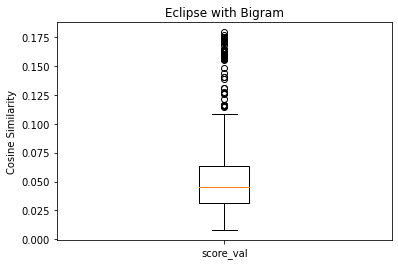

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.031624
more = 0.063928

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Bigram',
          value=avg_df.values)
score_similar_bigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] >= more]
score_similar_bigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
119,128,1492707,defect,Crash in java.lang.NullPointerException: Attem...,GeckoView,General,RESOLVED,0.092658,0.085633,DUPLICATE,2018-12-20 08:27:20,1492707,this bug was filed from the socorro interface ...,1492704.0
178,187,1637765,defect,Calling `install.cancel` throws when the exten...,GeckoView,Extensions,RESOLVED,0.071326,0.083739,DUPLICATE,2020-07-01 17:34:56,1637765,originally filed as bug if the extension ha...,1559683.0
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2144,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.174923,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.114444,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.104345,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
score_dissimilar_bigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] <= less]
score_dissimilar_bigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
675,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,5390,1359983,enhancement,[geckoview] video controls are broken,GeckoView,General,RESOLVED,0.023757,0.019539,DUPLICATE,2018-12-20 08:27:20,1359983,bug broke the video controls,1355538.0
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.025712,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.014648,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.020906,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0


In [ ]:
#Download to csv
score_similar_bigram.to_csv("Firefox_textually_similar_bigram_final.csv",index=False)
score_dissimilar_bigram_final.to_csv("Firefox_textually_dissimilar_bigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_bigram['Bug ID'].equals(score_similar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram = list(score_similar_bigram["Bug ID"])
bug_list_unigram = list(score_similar_unigram1_final["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id = []
for i,v in enumerate(bug_list_bigram):
    if (v in bug_list_unigram):
        count_id +=1
        dup_id_in_bug_id.append(v)

In [ ]:
len(dup_id_in_bug_id)

122

In [ ]:
dup_id_in_bug_id

In [ ]:
new_sim = score_similar_bigram [score_similar_bigram['Bug ID'].isin(dup_id_in_bug_id)]

In [ ]:
new_sim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2144,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.174923,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
2154,2206,1703350,defect,Intermittent org.mozilla.geckoview.test.TextIn...,GeckoView,General,RESOLVED,0.116423,0.136409,DUPLICATE,2021-12-12 22:00:43,1703350,filed by csabou at mozilla com parsed...,1681261.0
2188,2241,1574141,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.116148,0.138157,DUPLICATE,2021-07-30 18:59:53,1574141,filed by cbrindusan at mozilla com pa...,1564920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.114444,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.104345,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_bigram_final['Bug ID'].equals(score_dissimilar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram_dis = list(score_dissimilar_bigram_final["Bug ID"])
bug_list_unigram_dis = list(score_dissimilar_unigram1_final["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis = []
for i,v in enumerate(bug_list_bigram_dis):
    if (v in bug_list_unigram_dis):
        count_id +=1
        dup_id_in_bug_id_dis.append(v)

In [ ]:
len(dup_id_in_bug_id_dis)

138

In [ ]:
new_dissim = score_dissimilar_bigram_final [score_dissimilar_bigram_final['Bug ID'].isin(dup_id_in_bug_id_dis)]

In [ ]:
new_dissim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
675,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,5390,1359983,enhancement,[geckoview] video controls are broken,GeckoView,General,RESOLVED,0.023757,0.019539,DUPLICATE,2018-12-20 08:27:20,1359983,bug broke the video controls,1355538.0
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.025712,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.014648,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.020906,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0


## Trigram 

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(562, 10838)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02361163 0.02642169 ... 0.00460778 0.0023603  0.00458376]
 [0.02361163 1.         0.04669972 ... 0.00608413 0.00547486 0.00605241]
 [0.02642169 0.04669972 1.         ... 0.01289602 0.01089995 0.01324227]
 ...
 [0.00460778 0.00608413 0.01289602 ... 1.         0.98972238 0.9986182 ]
 [0.0023603  0.00547486 0.01089995 ... 0.98972238 1.         0.98873356]
 [0.00458376 0.00605241 0.01324227 ... 0.9986182  0.98873356 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.040260184440509286


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile   median  upper_quartile  \
0  score_val       0.007713        0.028266  0.04026        0.056586   

   upper_whisker  
0       0.096348  


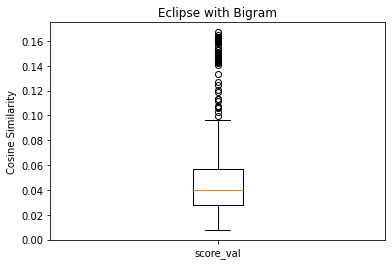

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.028266
more = 0.056586 

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Trigram',
          value=avg_df.values)
score_similar_trigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] >= more]
score_similar_trigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
119,128,1492707,defect,Crash in java.lang.NullPointerException: Attem...,GeckoView,General,RESOLVED,0.080022,0.092658,0.085633,DUPLICATE,2018-12-20 08:27:20,1492707,this bug was filed from the socorro interface ...,1492704.0
178,187,1637765,defect,Calling `install.cancel` throws when the exten...,GeckoView,Extensions,RESOLVED,0.061612,0.071326,0.083739,DUPLICATE,2020-07-01 17:34:56,1637765,originally filed as bug if the extension ha...,1559683.0
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.124524,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1845,1894,1592632,enhancement,Need a way to identify what site sent the Web ...,GeckoView,General,RESOLVED,0.056610,0.063234,0.082363,DUPLICATE,2021-02-09 13:21:59,1592632,user agent mozilla gecko firefox ...,1642345.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.162806,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.112931,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.066117,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.094707,0.114444,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.084035,0.104345,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
score_dissimilar_trigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] <= less]
score_dissimilar_trigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.022843,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.007713,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.026783,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.024667,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
675,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.022837,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,5390,1359983,enhancement,[geckoview] video controls are broken,GeckoView,General,RESOLVED,0.022381,0.023757,0.019539,DUPLICATE,2018-12-20 08:27:20,1359983,bug broke the video controls,1355538.0
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.023693,0.025712,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.013675,0.014648,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.019408,0.020906,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0


In [ ]:
#Download to csv
score_similar_trigram.to_csv("Firefox_textually_similar_trigram_final.csv",index=False)
score_dissimilar_trigram_final.to_csv("Firefox_textually_dissimilar_trigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_trigram['Bug ID'].equals(new_sim['Bug ID'])

False

In [ ]:
bug_list_trigram = list(score_similar_bigram["Bug ID"])
bug_list_bi_uni = list(new_sim["Bug ID"])

In [ ]:
len(bug_list_bi_uni)


122

In [ ]:
count_id = 0
dup_id_in_bug_id_tri = []
for i,v in enumerate(bug_list_trigram):
    if (v in bug_list_bi_uni):
        count_id +=1
        dup_id_in_bug_id_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_tri)

122

In [ ]:
dup_id_in_bug_id_tri

In [ ]:
new_sim_final = score_similar_trigram[score_similar_trigram['Bug ID'].isin(dup_id_in_bug_id_tri)]

In [ ]:
new_sim_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
1481,1525,1536820,defect,Intermittent org.mozilla.geckoview.test.WebExt...,GeckoView,General,RESOLVED,0.124524,0.140884,0.152394,DUPLICATE,2021-07-30 18:58:23,1536820,markdown filed by nerli at mozilla com ...,1535913.0
1977,2027,1466482,defect,Intermittent org.mozilla.geckoview.test.GeckoS...,GeckoView,General,RESOLVED,0.162806,0.174314,0.187525,DUPLICATE,2021-07-30 18:57:06,1466482,filed by apavel at mozilla com job id ...,1464351.0
2144,2195,1677708,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.162700,0.174923,0.190772,DUPLICATE,2021-08-15 23:00:48,1677708,filed by malexandru at mozilla com pa...,1678895.0
2154,2206,1703350,defect,Intermittent org.mozilla.geckoview.test.TextIn...,GeckoView,General,RESOLVED,0.099396,0.116423,0.136409,DUPLICATE,2021-12-12 22:00:43,1703350,filed by csabou at mozilla com parsed...,1681261.0
2188,2241,1574141,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.094800,0.116148,0.138157,DUPLICATE,2021-07-30 18:59:53,1574141,filed by cbrindusan at mozilla com pa...,1564920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5371,1618009,defect,Intermittent org.mozilla.geckoview.test.Conten...,GeckoView,General,RESOLVED,0.112931,0.131197,0.148447,DUPLICATE,2021-07-30 19:01:45,1618009,filed by nerli at mozilla com parsed ...,1617063.0
5309,5493,1683402,defect,Intermittent org.mozilla.geckoview.test.PanZoo...,GeckoView,General,RESOLVED,0.066117,0.086331,0.108805,DUPLICATE,2021-07-30 19:04:11,1683402,filed by rmaries at mozilla com parse...,1643815.0
5310,5494,1683466,defect,Intermittent org.mozilla.geckoview.test.Select...,GeckoView,General,RESOLVED,0.094707,0.114444,0.136043,DUPLICATE,2021-07-30 19:04:12,1683466,filed by ncsoregi at mozilla com pars...,1682775.0
5314,5498,1683596,defect,Intermittent org.mozilla.geckoview.test.Progre...,GeckoView,General,RESOLVED,0.084035,0.104345,0.126835,DUPLICATE,2021-07-30 19:04:15,1683596,filed by nbeleuzu at mozilla com pars...,1682775.0


In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_trigram_final['Bug ID'].equals(new_dissim['Bug ID'])

False

In [ ]:
bug_list_trigram_dis = list(score_dissimilar_trigram_final["Bug ID"])
bug_list_uni_bi_dis = list(new_dissim["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis_tri = []
for i,v in enumerate(bug_list_trigram_dis):
    if (v in bug_list_uni_bi_dis):
        count_id +=1
        dup_id_in_bug_id_dis_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_dis_tri)

131

In [ ]:
new_dissim_final = score_dissimilar_trigram_final [score_dissimilar_trigram_final['Bug ID'].isin(dup_id_in_bug_id_dis_tri)]

In [ ]:
new_dissim_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Bug Id,Description,Duplicate_Bug_Ids
37,41,1655196,defect,High ratio of ERROR_NO_MINIDUMP_HEADER,GeckoView,General,RESOLVED,0.022843,0.024739,0.031502,DUPLICATE,2021-02-04 09:57:49,1655196,talking to gsvelto today he pointed out that ...,1644486.0
87,96,1482876,defect,"Storage crash: lastInsertedRowID, 32-bit only,...",Firefox for iOS,General,RESOLVED,0.007713,0.008110,0.008482,DUPLICATE,2018-08-14 08:14:18,1482876,the brief crash report thread name thread...,1482487.0
133,142,1331985,defect,Crash: [UIApplication _cachedSystemAnimationFe...,Firefox for iOS,Browser,RESOLVED,0.026783,0.029034,0.014968,DUPLICATE,2017-04-11 06:26:10,1331985,created attachment crash cu...,1355440.0
315,326,1494388,defect,Remaining mochitest and reftest failures in Te...,GeckoView,General,RESOLVED,0.024667,0.027100,0.031792,DUPLICATE,2019-02-06 14:40:46,1494388,jobs repo try tier revision demons...,1460411.0
675,692,1568667,enhancement,Extend ContentBlocking API to support Social T...,GeckoView,General,RESOLVED,0.022837,0.024508,0.029621,DUPLICATE,2019-12-04 10:59:55,1568667,stp is a new blocklist setting we need to supp...,1568295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,5390,1359983,enhancement,[geckoview] video controls are broken,GeckoView,General,RESOLVED,0.022381,0.023757,0.019539,DUPLICATE,2018-12-20 08:27:20,1359983,bug broke the video controls,1355538.0
5222,5399,1341939,defect,Store bookmark creation dates,Firefox for iOS,Data Storage,RESOLVED,0.023693,0.025712,0.032145,DUPLICATE,2017-10-04 08:43:56,1341939,i don t think we store the remote timestamps a...,1335201.0
5241,5420,1410371,defect,UITest Failures: ClearPrivateData,Firefox for iOS,Build & Test,RESOLVED,0.013675,0.014648,0.011917,DUPLICATE,2017-10-20 11:31:28,1410371,these are the tests failing clea...,1410469.0
5270,5450,1392327,defect,Unable to remove newly added sites on the home...,Firefox for iOS,Home screen,RESOLVED,0.019408,0.020906,0.026375,DUPLICATE,2017-08-22 12:02:18,1392327,created attachment remove broken install ...,1391332.0


In [ ]:
#Download to csv
new_sim_final.to_csv("Mobile_final_sim.csv",index=False)
new_dissim_final.to_csv("Mobile_final_dis.csv",index=False)

In [ ]:
new_sim_final.info()

## Textually similar pair

In [ ]:
#dropping duplicates from Tex sim
df_sim = new_sim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_sim.shape

(122, 15)

In [ ]:
df_sim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_sim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()



s=[]
for i in range(0, 122):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 122):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 122):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 122):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values

a["is_similar"] = 1


a.head()

In [ ]:
a['summary2'][1]

"['Intermittent org.mozilla.geckoview.test.GeckoSessionTestRuleTest#forCallbacksDuringWait_limitedToLastSessionWait | status -2']"

In [ ]:
df_sim_fin= a.copy()
df_sim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1536820,1535913.0,0.124524,['Intermittent org.mozilla.geckoview.test.WebE...,[' markdown filed by nerli at mozilla co...,[],[],1
1,1466482,1464351.0,0.162806,['Intermittent org.mozilla.geckoview.test.Geck...,['filed by apavel at mozilla com job id...,['Intermittent org.mozilla.geckoview.test.Geck...,['filed by ncsoregi at mozilla com job ...,1
2,1677708,1678895.0,0.162700,['Intermittent org.mozilla.geckoview.test.PanZ...,[' filed by malexandru at mozilla com ...,[],[],1
3,1703350,1681261.0,0.099396,['Intermittent org.mozilla.geckoview.test.Text...,[' filed by csabou at mozilla com pars...,[],[],1
4,1574141,1564920.0,0.094800,['Intermittent org.mozilla.geckoview.test.Cont...,[' filed by cbrindusan at mozilla com ...,[],[],1
...,...,...,...,...,...,...,...,...
117,1618009,1617063.0,0.112931,['Intermittent org.mozilla.geckoview.test.Cont...,[' filed by nerli at mozilla com parse...,['Intermittent org.mozilla.geckoview.test.Cont...,[' filed by nerli at mozilla com parse...,1
118,1683402,1643815.0,0.066117,['Intermittent org.mozilla.geckoview.test.PanZ...,[' filed by rmaries at mozilla com par...,[],[],1
119,1683466,1682775.0,0.094707,['Intermittent org.mozilla.geckoview.test.Sele...,[' filed by ncsoregi at mozilla com pa...,[],[],1
120,1683596,1682775.0,0.084035,['Intermittent org.mozilla.geckoview.test.Prog...,[' filed by nbeleuzu at mozilla com pa...,[],[],1


In [ ]:
df_sim_fin['summary2'] = df_sim_fin['summary2'].replace(['[]'],'0')
df_sim_fin['description2'] = df_sim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['summary2']=='0'].index, inplace=True)
df_sim_fin

In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['description2']=='0'].index, inplace=True)
df_sim_fin

In [ ]:
df_sim_fin.to_csv("Mobile_textually_similar_pair.csv")
from google.colab import files
files.download("Mobile_textually_similar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Textually dissimilar pair

In [ ]:
#dropping duplicates from Tex sim
df_dissim = new_dissim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_dissim.shape

(131, 15)

In [ ]:
df_dissim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_dissim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()


s=[]
for i in range(0, 131):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 131):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 131):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 131):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values
a["is_similar"] = 1

a.head()

In [ ]:
a['summary2'][1]

"['Crash in Storage:ConcreteSQLiteDBConnection.lastInsertedRowID (armv7, iOS 10.3 only)']"

In [ ]:
df_dissim_fin= a.copy()
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1655196,1644486.0,0.022843,['High ratio of ERROR_NO_MINIDUMP_HEADER'],['talking to gsvelto today he pointed out tha...,[],[],1
1,1482876,1482487.0,0.007713,"['Storage crash: lastInsertedRowID, 32-bit onl...",['the brief crash report thread name thre...,['Crash in Storage:ConcreteSQLiteDBConnection....,['this crash is happening in firefox for ios ...,1
2,1331985,1355440.0,0.026783,['Crash: [UIApplication _cachedSystemAnimation...,['created attachment crash ...,['Crash in UIApplication#_cachedSystemAnimatio...,['created attachment crash ...,1
3,1494388,1460411.0,0.024667,['Remaining mochitest and reftest failures in ...,[' jobs repo try tier revision demo...,[],[],1
4,1568667,1568295.0,0.022837,['Extend ContentBlocking API to support Social...,['stp is a new blocklist setting we need to su...,['Expose Disconnect social tracker list (socia...,['fenix would like to expose a user setting to...,1
...,...,...,...,...,...,...,...,...
126,1359983,1355538.0,0.022381,['[geckoview] video controls are broken'],['bug broke the video controls '],[],[],1
127,1341939,1335201.0,0.023693,['Store bookmark creation dates'],['i don t think we store the remote timestamps...,"[""Sync bookmarks' creation date""]",['following desktop s lead in bug we need t...,1
128,1410371,1410469.0,0.013675,['UITest Failures: ClearPrivateData'],['these are the tests failing cl...,[],[],1
129,1392327,1391332.0,0.019408,['Unable to remove newly added sites on the ho...,['created attachment remove broken instal...,['Recently visited sites are not being listed ...,['recently visited sites are not being listed ...,1


In [ ]:
df_dissim_fin['summary2'] = df_dissim_fin['summary2'].replace(['[]'],'0')
df_dissim_fin['description2'] = df_dissim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['summary2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
1,1482876,1482487.0,0.007713,"['Storage crash: lastInsertedRowID, 32-bit onl...",['the brief crash report thread name thre...,['Crash in Storage:ConcreteSQLiteDBConnection....,['this crash is happening in firefox for ios ...,1
2,1331985,1355440.0,0.026783,['Crash: [UIApplication _cachedSystemAnimation...,['created attachment crash ...,['Crash in UIApplication#_cachedSystemAnimatio...,['created attachment crash ...,1
4,1568667,1568295.0,0.022837,['Extend ContentBlocking API to support Social...,['stp is a new blocklist setting we need to su...,['Expose Disconnect social tracker list (socia...,['fenix would like to expose a user setting to...,1
5,1561018,1566367.0,0.023645,"[""Replace GV's Gecko telemetry snapshot API wi...",['work breakdown for moving gv from the old ge...,['Implement a new GV API for Glean streaming t...,['this is for implementing the new geckoview s...,1
7,1618579,1618582.0,0.026124,['Text selection caret is misplaced with dynam...,['created attachment testcase html load min...,['Dynamic toolbar should not hide when page is...,['created attachment testcase html elements...,1
...,...,...,...,...,...,...,...,...
122,1389109,1370271.0,0.014077,['Drop support for iOS 9'],['our new minimal deployment target should be ...,['Deprecate support for iOS 9'],['with ios around the corner it might be wo...,1
123,1439912,1443133.0,0.023697,['[RTL] Top tabs are left aligned after switch...,[' open tabs in normal browsing ...,['TopTabs RTL Support'],['properly support rtl for toptabs marked as...,1
127,1341939,1335201.0,0.023693,['Store bookmark creation dates'],['i don t think we store the remote timestamps...,"[""Sync bookmarks' creation date""]",['following desktop s lead in bug we need t...,1
129,1392327,1391332.0,0.019408,['Unable to remove newly added sites on the ho...,['created attachment remove broken instal...,['Recently visited sites are not being listed ...,['recently visited sites are not being listed ...,1


In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['description2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
1,1482876,1482487.0,0.007713,"['Storage crash: lastInsertedRowID, 32-bit onl...",['the brief crash report thread name thre...,['Crash in Storage:ConcreteSQLiteDBConnection....,['this crash is happening in firefox for ios ...,1
2,1331985,1355440.0,0.026783,['Crash: [UIApplication _cachedSystemAnimation...,['created attachment crash ...,['Crash in UIApplication#_cachedSystemAnimatio...,['created attachment crash ...,1
4,1568667,1568295.0,0.022837,['Extend ContentBlocking API to support Social...,['stp is a new blocklist setting we need to su...,['Expose Disconnect social tracker list (socia...,['fenix would like to expose a user setting to...,1
5,1561018,1566367.0,0.023645,"[""Replace GV's Gecko telemetry snapshot API wi...",['work breakdown for moving gv from the old ge...,['Implement a new GV API for Glean streaming t...,['this is for implementing the new geckoview s...,1
7,1618579,1618582.0,0.026124,['Text selection caret is misplaced with dynam...,['created attachment testcase html load min...,['Dynamic toolbar should not hide when page is...,['created attachment testcase html elements...,1
...,...,...,...,...,...,...,...,...
122,1389109,1370271.0,0.014077,['Drop support for iOS 9'],['our new minimal deployment target should be ...,['Deprecate support for iOS 9'],['with ios around the corner it might be wo...,1
123,1439912,1443133.0,0.023697,['[RTL] Top tabs are left aligned after switch...,[' open tabs in normal browsing ...,['TopTabs RTL Support'],['properly support rtl for toptabs marked as...,1
127,1341939,1335201.0,0.023693,['Store bookmark creation dates'],['i don t think we store the remote timestamps...,"[""Sync bookmarks' creation date""]",['following desktop s lead in bug we need t...,1
129,1392327,1391332.0,0.019408,['Unable to remove newly added sites on the ho...,['created attachment remove broken instal...,['Recently visited sites are not being listed ...,['recently visited sites are not being listed ...,1


In [ ]:
df_dissim_fin.to_csv("Mobile_textually_dissimilar_pair.csv")
from google.colab import files
files.download("Mobile_textually_dissimilar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>